In [1]:
import csv as csv
import numpy as np

C:\Users\Joey\Anaconda\lib\site-packages\numpy\core\__init__.py:14: Warning: Numpy built with MINGW-W64 on Windows 64 bits is experimental, and only available for 
testing. You are advised not to use it for production. 

CRASHES ARE TO BE EXPECTED - PLEASE REPORT THEM TO NUMPY DEVELOPERS
  from . import multiarray


In [2]:
csv_file_object = csv.reader(open('Desktop/Titanic Data/train.csv'))
header = csv_file_object.next()

data = []
for row in csv_file_object:
    data.append(row)
data = np.array(data)

In [3]:
number_passengers = np.size(data[:,1].astype(np.float))
number_survived = np.sum(data[:,1].astype(np.float))
proportion_survivors = number_survived / number_passengers

In [5]:
women_only_stats = data[:,4] == 'female'
men_only_stats = data[:,4] != 'female'

In [6]:
women_onboard = data[women_only_stats,1].astype(np.float)
men_onboard = data[men_only_stats,1].astype(np.float)

proportion_women_survived = np.sum(women_onboard)/np.size(women_onboard)
proportion_men_survived = np.sum(men_onboard)/np.size(men_onboard)

print('Proportion of women who survived is %s' %proportion_women_survived)
print('Proportion of men who survived is %s' %proportion_men_survived)

Proportion of women who survived is 0.742038216561
Proportion of men who survived is 0.188908145581


In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('Desktop/Titanic Data/train.csv', header = 0)

In [8]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
##Now time for Random Forests

In [1]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

C:\Users\Joey\Anaconda\lib\site-packages\numpy\core\__init__.py:14: Warning: Numpy built with MINGW-W64 on Windows 64 bits is experimental, and only available for 
testing. You are advised not to use it for production. 

CRASHES ARE TO BE EXPECTED - PLEASE REPORT THEM TO NUMPY DEVELOPERS
  from . import multiarray


In [2]:
def format_titanic_data(trainfile,testfile,predictors):
    titanic = pd.read_csv(trainfile)
    test = pd.read_csv(testfile)
    '''convert data to usable values'''
    for data in [titanic,test]:
        #replace Sex with numbers
        data.loc[data.Sex=='male','Sex']  = 0
        data.loc[data.Sex=='female','Sex']= 1
        #replace Embarked values with numbers
        data.Embarked = data.Embarked.fillna('S')
        data.loc[data.Embarked == 'S', 'Embarked']    =0
        data.loc[data.Embarked == 'C', 'Embarked']    =1
        data.loc[data.Embarked == 'Q', 'Embarked']    =2
    
    for field in predictors:
        titanic[field] = titanic[field].fillna(titanic[field].median())
        test[field] = test[field].fillna(titanic[field].median())
    return titanic, test


trainfile = 'Desktop/Titanic Data/train.csv'
testfile = 'Desktop/Titanic Data/test.csv'
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic,test = format_titanic_data(trainfile,testfile,predictors)



In [3]:


#sklearn can do it just like pandas can! but only if data is all numbers
def imputation_with_sklearn():
    from sklearn.preprocessing import Imputer
    imp = Imputer(strategy='median')
    imp.fit(titanic)
    imputed_train = imp.transform(titanic)
    #remember, you need to use the median of the training data, not the test data
    imputed_test= imp.transform(test)



In [4]:


#what if features are missing entirely?
def missing_column_example():
    mask = np.all(np.isnan(train),axis=0)
    train[:,mask] = 0.0



In [5]:


#%%timeit
alg = RandomForestClassifier(random_state=1, 
                             n_estimators=150,           #number of trees
                             max_features='auto',        #number of features to consider at each split
                             max_depth = None,           #depth of tree if known      
                             min_samples_split=4,        #tree won't split unless at least this many samples in each branch
                             min_samples_leaf=2,         #tree won't split unless at least this many samples in each leaf
                             min_weight_fraction_leaf=0, #similar to min_samples_leaf except comparative
                             max_leaf_nodes=None,        #contraining the depth by limiting the number of leaves
                             n_jobs=4)                   #number of cores to use in calculation. default = 1, -1 means use all cores
predictions = cross_validation.cross_val_predict(alg, 
                                                 titanic[predictors], 
                                                 titanic["Survived"], 
                                                 cv=3)
scores = cross_validation.cross_val_score(alg, 
                                          titanic[predictors], 
                                          titanic["Survived"], 
                                          cv=3, 
                                          scoring ='accuracy' )
print np.mean(scores)



0.820426487093


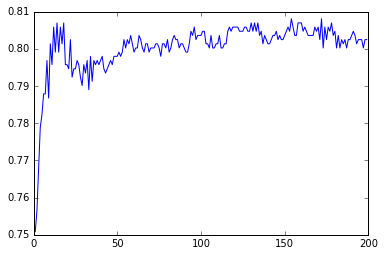

In [6]:
#lets play around with our number of trees
trees = range(1,200)
allscores = []
for i in trees:
    
    alg = RandomForestClassifier(random_state=1, 
                                 n_estimators=i)
    predictions = cross_validation.cross_val_predict(alg, 
                                                     titanic[predictors], 
                                                     titanic["Survived"], 
                                                     cv=3)
    scores = cross_validation.cross_val_score(alg, 
                                              titanic[predictors], 
                                              titanic["Survived"], 
                                              cv=3, 
                                              scoring ='accuracy' )
    allscores.append(np.mean(scores))
plt.plot(trees,allscores)
plt.show()

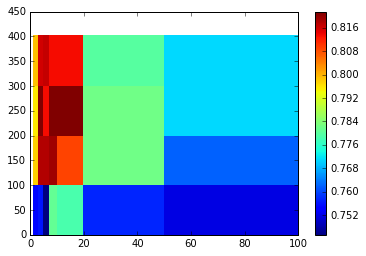

In [7]:
#lets play around with our number of trees and min leaf size
trees = range(1,501,100)
minsampleleafs= [1,3,5,7,10,20,50,100]
allscores = np.zeros((len(trees),len(minsampleleafs)))
for i,tree in enumerate(trees):
    for j,leaf in enumerate(minsampleleafs):
        alg = RandomForestClassifier(min_samples_leaf=leaf,   
                                     n_estimators=tree)
        predictions = cross_validation.cross_val_predict(alg, 
                                                         titanic[predictors], 
                                                         titanic["Survived"], 
                                                         cv=3)
        scores = cross_validation.cross_val_score(alg, 
                                                  titanic[predictors], 
                                                  titanic["Survived"], 
                                                  cv=3, 
                                                  scoring ='accuracy' )
        allscores[i,j]=np.mean(scores)
plt.pcolormesh(minsampleleafs,trees,allscores)
plt.colorbar()
plt.show()

In [11]:


alg.fit(titanic[predictors],
        titanic["Survived"])
prediction = alg.predict(test[predictors])
print prediction

#save it 
submission = pd.DataFrame({ "Survived": prediction,"PassengerId":test.PassengerId})
submission.to_csv('Desktop/Titanic Data/results',index=False)
print submission[:10]



[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5

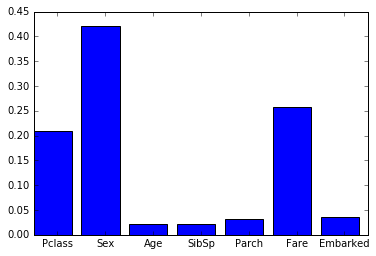

In [12]:
plt.bar(np.arange(len(predictors)),alg.feature_importances_,tick_label=predictors)
plt.xticks(np.arange(len(predictors))+.5)
plt.show()